In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import shutil
import os

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
content = Path.iterdir(Path.cwd())

In [3]:
dataframes = {}
for file in content:
    if file.is_file():
        dataframes[file.stem] = pd.read_csv(file.name, error_bad_lines=False, warn_bad_lines=False)

In [4]:
print(*dataframes.keys(), sep='\n')

April edition
Exploratory Data Analysis(April Edition)
olist_customers_dataset
olist_geolocation_dataset
olist_orders_dataset
olist_order_items_dataset
olist_order_payments_dataset
olist_order_reviews_dataset
olist_products_dataset
olist_sellers_dataset
product_category_name_translation


### What is the total revenue generated by Olist, and how has it changed overtime

In [5]:
df_orders = dataframes['olist_orders_dataset']
df_order_payment = dataframes['olist_order_payments_dataset']

In [6]:
df1 = pd.merge(df_orders, df_order_payment, on='order_id', how='left')
df1.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103887 non-null  object 
 1   customer_id                    103887 non-null  object 
 2   order_status                   103887 non-null  object 
 3   order_purchase_timestamp       103887 non-null  object 
 4   order_approved_at              103712 non-null  object 
 5   order_delivered_carrier_date   101999 non-null  object 
 6   order_delivered_customer_date  100755 non-null  object 
 7   order_estimated_delivery_date  103887 non-null  object 
 8   payment_sequential             103886 non-null  float64
 9   payment_type                   103886 non-null  object 
 10  payment_installments           103886 non-null  float64
 11  payment_value                  103886 non-null  float64
dtypes: float64(3), object(9)
memor

In [8]:
date_cols='order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date'.split(', ')
date_cols

['order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [9]:
for col in date_cols:
    df1[col] = pd.to_datetime(df1[col])

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  object        
 1   customer_id                    103887 non-null  object        
 2   order_status                   103887 non-null  object        
 3   order_purchase_timestamp       103887 non-null  datetime64[ns]
 4   order_approved_at              103712 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101999 non-null  datetime64[ns]
 6   order_delivered_customer_date  100755 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103887 non-null  datetime64[ns]
 8   payment_sequential             103886 non-null  float64       
 9   payment_type                   103886 non-null  object        
 10  payment_installments           103886 non-null  float64       
 11  

In [11]:
df1.duplicated().sum()

0

In [12]:
#calculate total revenue
total_revenue=df1['payment_value'].sum()
print('Total revenue generated by Olist: ${:,.2f}'.format(total_revenue))

Total revenue generated by Olist: $16,008,872.12


In [13]:
revenue_by_quarter = df1.set_index('order_approved_at')

In [14]:
quarter_total_revenue = revenue_by_quarter.resample('3M', closed='left').payment_value.sum().to_frame()
quarter_total_revenue

,payment_value
order_approved_at,
2016-11-30,58380.74
2017-02-28,411801.05
2017-05-31,1440744.95
2017-08-31,1764883.85
2017-11-30,2674922.43
2018-02-28,2973935.28
2018-05-31,3514186.35
2018-08-31,3132721.24
2018-11-30,166.46


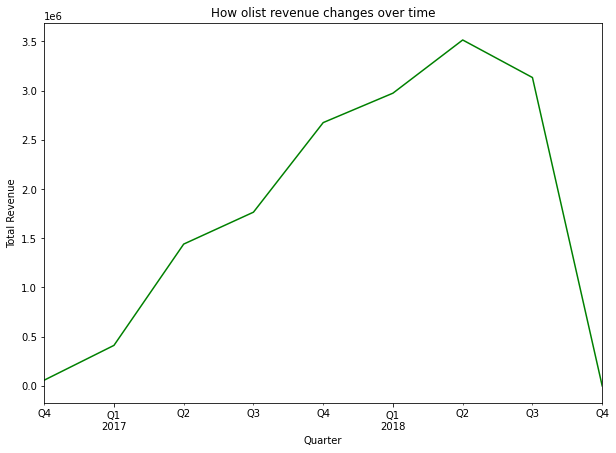

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
quarter_total_revenue.plot.line(color='green', ax = ax, legend=False)
ax.set_title('How olist revenue changes over time')
ax.set_xlabel('Quarter')
ax.set_ylabel('Total Revenue')
plt.show()

### 2. How many orders were place on Olist, how does it vary by month or season

In [16]:
valid_orders = df_orders[df_orders['order_status'] != 'canceled']
valid_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [17]:
len(valid_orders['order_id'])

98816

In [18]:
valid_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98816 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       98816 non-null  object
 1   customer_id                    98816 non-null  object
 2   order_status                   98816 non-null  object
 3   order_purchase_timestamp       98816 non-null  object
 4   order_approved_at              98797 non-null  object
 5   order_delivered_carrier_date   97583 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  98816 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB


In [19]:
valid_orders['order_approved_at'] = pd.to_datetime(valid_orders['order_approved_at'])

In [20]:
order_by_month = valid_orders.set_index('order_approved_at')

In [21]:
order_change_with_month = order_by_month.resample('M', closed='left').order_status.count().to_frame()
order_change_with_month

,order_status
order_approved_at,
2016-09-30,1
2016-10-31,300
2016-11-30,0
2016-12-31,1
2017-01-31,684
2017-02-28,1778
2017-03-31,2635
2017-04-30,2371
2017-05-31,3603


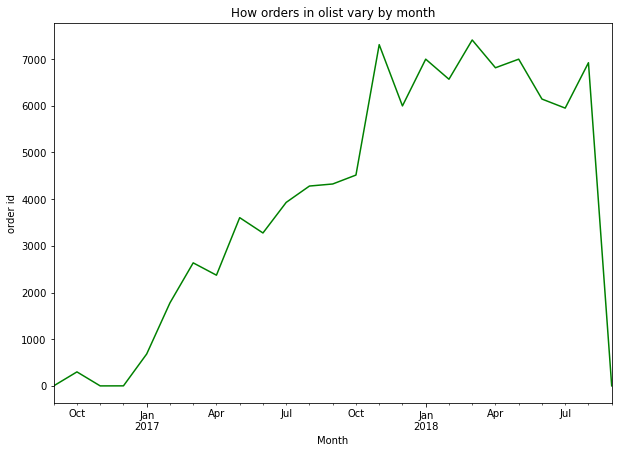

In [22]:
fig, ax = plt.subplots(figsize=(10,7))
order_change_with_month.plot.line(color='green', ax = ax, legend=False)
ax.set_title('How orders in olist vary by month')
ax.set_xlabel('Month')
ax.set_ylabel('order id')
plt.show()

### 3. What are the most popular product categories, and how do their sales volumes compare to each other

In [23]:
df_order_items=dataframes['olist_order_items_dataset']
df_order_payments=dataframes['olist_order_payments_dataset']
df_product=dataframes['olist_products_dataset']
df_productname_translation=dataframes['product_category_name_translation']

In [24]:
df_order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [25]:
df_order_payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [26]:
df_product.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [27]:
df_productname_translation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [28]:
df_order=pd.merge(df_order_items,df_order_payments,on='order_id', how='left')
df1=pd.merge(df_order, df_product, on='product_id', how='left')
final_df=pd.merge(df1,df_productname_translation, on='product_category_name', how='left')
final_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,credit_card,2.0,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,1.0,credit_card,3.0,259.83,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop


In [29]:
cat= final_df[['order_id', 'product_id', 'payment_value', 'product_category_name_english']]

In [30]:
cat_count = cat.groupby('product_category_name_english').agg({'order_id': 'count', 'payment_value' : sum}).sort_values('order_id', ascending=False)
cat_count = cat_count.rename(columns = {'order_id': 'total_units_ordered', 'payment_value': 'total_revenue'})

In [31]:
cat_count

,total_units_ordered,total_revenue
product_category_name_english,,
bed_bath_table,11823,1712553.67
health_beauty,9975,1657373.12
sports_leisure,8945,1392127.56
furniture_decor,8744,1430176.39
computers_accessories,8082,1585330.45
...,...,...
arts_and_craftmanship,24,2326.17
la_cuisine,16,2913.53
cds_dvds_musicals,14,1199.43


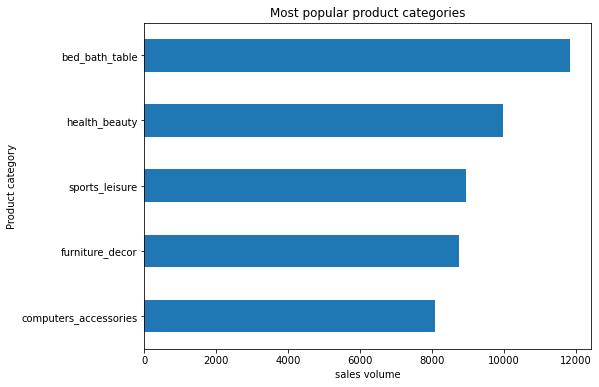

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
popular_product_categories = cat_count.total_units_ordered[:5].sort_values(ascending=True)
popular_product_categories.plot.barh()
ax.set_xlabel('sales volume')
ax.set_ylabel('Product category')
ax.set_title('Most popular product categories')
plt.show()

### 4. What is the average order value(AOV) on Olist, and how does this vary by product category or payment type

In [33]:
#what's the average order value
round(total_revenue.mean(),2)

16008872.12

In [34]:
avg_order_value_by_paymenttype=final_df.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False).round(2)
avg_order_value_by_paymenttype

payment_type
credit_card    179.66
boleto         177.54
debit_card     149.93
voucher         64.69
Name: payment_value, dtype: float64

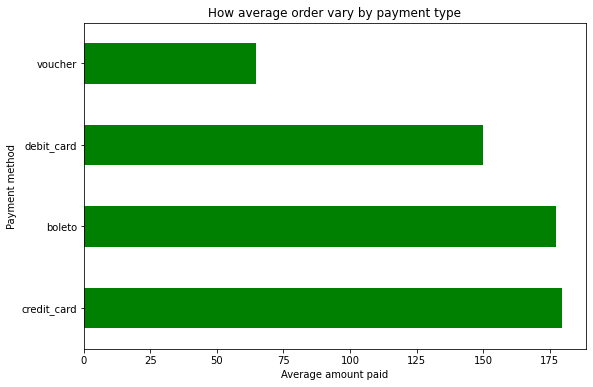

In [35]:
fig,ax = plt.subplots(figsize=(9,6))
avg_order_value_by_paymenttype.plot.barh(color='green', ax=ax)
ax.set_title('How average order vary by payment type')
ax.set_xlabel('Average amount paid')
ax.set_ylabel('Payment method')
plt.show()

### 5. How many sellers are active and how does it change over time

In [36]:
df_sellers=dataframes['olist_sellers_dataset']
df_order_items=dataframes['olist_order_items_dataset']
df_order=dataframes['olist_orders_dataset']

In [37]:
df_sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [38]:
df_order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [39]:
df_order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [40]:
df=pd.merge(df_sellers, df_order_items, on='seller_id', how='left')
df1=pd.merge(df, df_order, on='order_id', how='left')
df1.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.2,9.56,9d6837f9700a3441e7183bff3bc4eef0,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.7,15.92,a973c4e3ad82777add3fa188f91dacea,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   seller_id                      112650 non-null  object 
 1   seller_zip_code_prefix         112650 non-null  int64  
 2   seller_city                    112650 non-null  object 
 3   seller_state                   112650 non-null  object 
 4   order_id                       112650 non-null  object 
 5   order_item_id                  112650 non-null  int64  
 6   product_id                     112650 non-null  object 
 7   shipping_limit_date            112650 non-null  object 
 8   price                          112650 non-null  float64
 9   freight_value                  112650 non-null  float64
 10  customer_id                    112650 non-null  object 
 11  order_status                   112650 non-null  object 
 12  order_purchase_timestamp      

In [42]:
df1['order_purchase_timestamp']=pd.to_datetime(df1['order_purchase_timestamp'])
df1['order_purchase_timestamp']

0        2017-08-21 20:35:44
1        2017-05-05 16:12:29
2        2017-08-30 11:47:52
3        2017-11-10 16:54:13
4        2017-09-28 19:31:57
                 ...        
112645   2017-03-01 02:16:01
112646   2017-02-09 16:42:59
112647   2017-04-03 17:54:02
112648   2017-06-16 17:21:21
112649   2017-03-27 09:59:40
Name: order_purchase_timestamp, Length: 112650, dtype: datetime64[ns]

In [43]:
df1['order_purchase_datestamp'] = pd.to_datetime(df1['order_purchase_timestamp']).dt.date
df1['order_purchase_timestamp'] = pd.to_datetime(df1['order_purchase_timestamp']).dt.time

In [44]:
df1.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_datestamp
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.2,9.56,9d6837f9700a3441e7183bff3bc4eef0,delivered,20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,2017-08-21
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.7,15.92,a973c4e3ad82777add3fa188f91dacea,delivered,16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,2017-05-05


In [45]:
active_sellers=df1[['order_purchase_timestamp','seller_id']]
active_sellers

,order_purchase_timestamp,seller_id
0,20:35:44,3442f8959a84dea7ee197c632cb2df15
1,16:12:29,3442f8959a84dea7ee197c632cb2df15
2,11:47:52,3442f8959a84dea7ee197c632cb2df15
3,16:54:13,d1b65fc7debc3361ea86b5f14c68d2e2
4,19:31:57,d1b65fc7debc3361ea86b5f14c68d2e2
...,...,...
112645,02:16:01,e603cf3fec55f8697c9059638d6c8eb5
112646,16:42:59,e603cf3fec55f8697c9059638d6c8eb5
112647,17:54:02,e603cf3fec55f8697c9059638d6c8eb5
112648,17:21:21,e603cf3fec55f8697c9059638d6c8eb5


In [46]:
active_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   order_purchase_timestamp  112650 non-null  object
 1   seller_id                 112650 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [47]:
active_sellers['order_purchase_datestamp']=pd.to_datetime(df1['order_purchase_datestamp'])
active_sellers['order_purchase_datestamp']

0        2017-08-21
1        2017-05-05
2        2017-08-30
3        2017-11-10
4        2017-09-28
            ...    
112645   2017-03-01
112646   2017-02-09
112647   2017-04-03
112648   2017-06-16
112649   2017-03-27
Name: order_purchase_datestamp, Length: 112650, dtype: datetime64[ns]

In [48]:
active_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_purchase_timestamp  112650 non-null  object        
 1   seller_id                 112650 non-null  object        
 2   order_purchase_datestamp  112650 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 3.4+ MB


In [49]:
seller_counts=active_sellers.groupby(['order_purchase_datestamp'])['seller_id'].nunique()
seller_counts

order_purchase_datestamp
2016-09-04     1
2016-09-05     1
2016-09-15     1
2016-10-02     1
2016-10-03     7
              ..
2018-08-26    68
2018-08-27    60
2018-08-28    35
2018-08-29    11
2018-09-03     1
Name: seller_id, Length: 616, dtype: int64

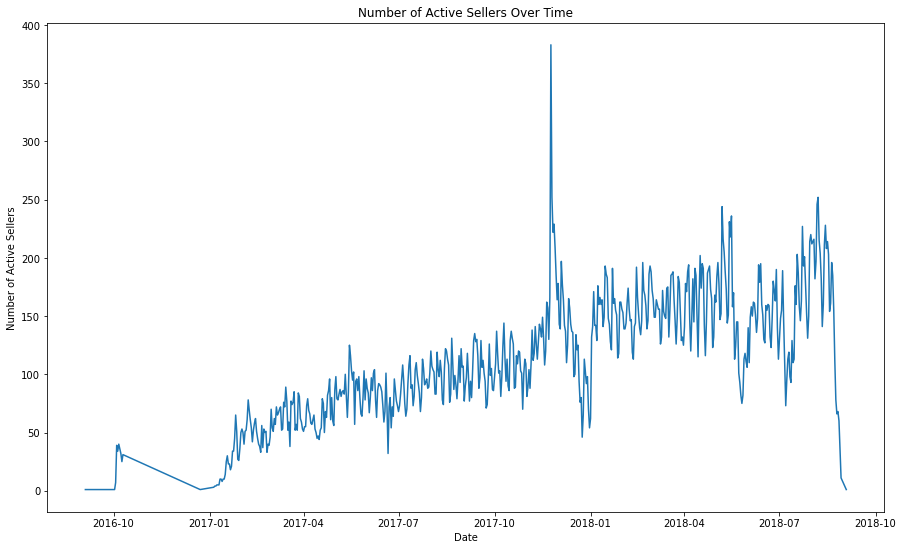

In [50]:
fig = plt.figure(figsize=(15, 9))
plt.plot(seller_counts.index, seller_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Active Sellers')
plt.title('Number of Active Sellers Over Time')
plt.show()

### 6.What is the distribution of seller ratings on Olist, and how does this impact sales performance

In [51]:
df_sellers=dataframes['olist_order_payments_dataset']
df_review=dataframes['olist_order_reviews_dataset']
df_payment=dataframes['olist_order_payments_dataset']

In [52]:
df_sellers.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [53]:
df_review.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [54]:
df_payment.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [55]:
df_sellers_review=pd.merge(df_sellers, df_payment, on='order_id', how='left')
df_final=pd.merge(df_sellers_review, df_review, on='order_id', how='left')
df_final.head(2)

,order_id,payment_sequential_x,payment_type_x,payment_installments_x,payment_value_x,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16


In [56]:
df_final.shape

(123833, 15)

In [57]:
df_final.rename(columns = {'payment_value_x': 'total_sales', 'review_score' : 'sellers_score'}, inplace=True)

In [58]:
rating_counts=df_final['sellers_score'].value_counts()
print(rating_counts)

5    70763
4    23478
1    15533
3     9875
2     4184
Name: sellers_score, dtype: int64


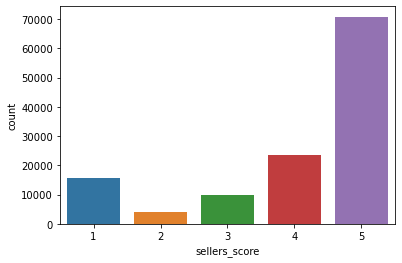

In [59]:
import seaborn as sns
sns.countplot(x=df_final['sellers_score'], data=df_final)
plt.show()

In [60]:
total_ratings=rating_counts.sum()
total_ratings

123833

In [61]:
# sellers rating distribution
rating_dist=rating_counts/total_ratings
rating_dist.sort_index(ascending=False)

5    0.571439
4    0.189594
3    0.079744
2    0.033787
1    0.125435
Name: sellers_score, dtype: float64

In [62]:
#impact of sellers rating on sales
sales_by_rating=df_final.groupby('sellers_score')['total_sales'].sum()
sales_by_rating.sort_index(ascending=False)

sellers_score
5    9365853.00
4    3121332.31
3    1302772.71
2     591182.41
1    2439345.61
Name: total_sales, dtype: float64

Observation: when the sellers were rated 5, the total sales generated was 9365853.00, when the sellers were rated 4, the total sales generated was 3121332.31, when the sellers were rated 3, the total sales generated was 1302772.71, when the sellers were rated 2, the total sales generated was 591182.41, when the sellers were rated 1, the total sales generated was 2439345.61.

### 7. How many customers have made repeat purchases on Olist , and what percentage of total sales do they account for

In [63]:
#merge the datasets
df_customer=dataframes['olist_customers_dataset']
df_order=dataframes['olist_orders_dataset']
df_payment=dataframes['olist_order_payments_dataset']

In [64]:
df_customer.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [65]:
df_order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [66]:
df_payment.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [67]:
df2=pd.merge(df_customer, df_order, on='customer_id', how='left')
df3=pd.merge(df2, df_payment, on='order_id', how='left')
df3.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,credit_card,8.0,335.48


In [68]:
customer_orders = df3.groupby('customer_unique_id')['payment_value'].agg(['count','sum'])
customer_orders

,count,sum
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19
0000f46a3911fa3c0805444483337064,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,1,43.62
0004aac84e0df4da2b147fca70cf8255,1,196.89
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,1,84.58
ffff371b4d645b6ecea244b27531430a,1,112.46


In [69]:
repeat_purchases=customer_orders[customer_orders['count']>1]
repeat_purchases

,count,sum
customer_unique_id,,
000e309254ab1fc5ba99dd469d36bdb4,2,78.42
00172711b30d52eea8b313a7f2cced02,2,244.14
0028a7d8db7b0247652509358ad8d755,2,354.87
00324c9f4d710e7bac5c5ba679714430,2,109.78
004288347e5e88a27ded2bb23747066c,2,354.37
...,...,...
ff9584b796ae561b0085ebc998880a64,2,50.05
ff9bc66daa6702543b16f3c4897e300b,2,97.99
ff9c04f464ea62ad7787a0218336b942,2,91.38


In [70]:
#to get percentage of sales, we have to calculate sales made by all customers and total sales made by repeat customers
total_sales=df3['payment_value'].sum()
repeat_sales=repeat_purchases['sum'].sum()

In [71]:
pct_repeat_sales=(repeat_sales/total_sales)*100

In [73]:
print('Percentage of total sales made by repeat customers:', round(pct_repeat_sales,2),'%')

Percentage of total sales made by repeat customers: 8.78 %


### 8. What is the average customer rating for products sold on Olist, and how does this impact sales performance

In [74]:
df_review=dataframes['olist_order_reviews_dataset']
df_order=dataframes['olist_orders_dataset']
df_payment=dataframes['olist_order_payments_dataset']

In [75]:
df_review.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [76]:
df_order.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [77]:
df_payment.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [78]:
merged_dataset=pd.merge(df_order, df_review, on='order_id', how='left')
final_merged_dataset=pd.merge(merged_dataset, df_payment, on='order_id', how='left')
final_merged_dataset.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00


In [79]:
valid_orders = ~ final_merged_dataset.order_status.isin(['cancelled', 'unavailable'])
final_merged_dataset=final_merged_dataset[valid_orders] 

In [80]:
final_merged_dataset.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00


In [81]:
import numpy as np
avg_rating=np.mean(final_merged_dataset['review_score'])
avg_rating

4.084432031588578

In [82]:
total_ratings=final_merged_dataset['review_score'].sum()
total_ratings

424107

In [83]:
sales_by_rating=final_merged_dataset.groupby('review_score')['payment_value'].sum()
sales_by_rating.sort_index(ascending=False)

review_score
5    8965933.68
4    2972293.56
3    1249221.73
2     546140.45
1    2222685.75
Name: payment_value, dtype: float64

Observation: when the sellers were rated 5, the total sales generated was 9365853.00, when the sellers were rated 4, the total sales generated was 3121332.31, when the sellers were rated 3, the total sales generated was 1302772.71, when the sellers were rated 2, the total sales generated was 591182.41, when the sellers were rated 1, the total sales generated was 2439345.61.

### 9.What is the average order cancellation rate on Olist, and how does this impact sellers performance

In [84]:
df_order=dataframes['olist_orders_dataset']
df_order_items=dataframes['olist_order_items_dataset']
df_sellers=dataframes['olist_sellers_dataset']
df_review=dataframes['olist_order_reviews_dataset']

In [85]:
df_order.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [86]:
df_order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [87]:
df_sellers.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [88]:
df_review.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [89]:
df1=pd.merge(df_order, df_order_items, on='order_id', how='left')
df2=pd.merge(df1, df_review, on='order_id', how='left')
df2.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48


In [90]:
df2['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [91]:
canceled_order=df2[df2['order_status'] =='canceled']
canceled_order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
448,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00,1.0,ad673c1cd02b966e931f9db4fdc34791,9646c3513289980f17226a2fc4720dbd,2018-08-14 04:10:26,25.0,8.34,14d540de5632307e389e9416086fc978,1,NaN,NaN,2018-08-17 00:00:00,2018-08-19 13:51:01
707,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00,1.0,a0b7d5a992ccda646f2d34e418fff5a0,95f83f51203c626648c875dd41874c7f,2018-02-01 21:58:39,69.9,26.11,f242ce44c6572a94907a446b8fda32c8,1,NaN,Olá!\r\nMinha queixa é a não entrega na residê...,2018-03-02 00:00:00,2018-03-05 01:28:24


In [92]:
total_transactions=df2['order_status'].count().sum()
total_transactions

114100

In [93]:
canceled_transactions=canceled_order['order_status'].count().sum()
canceled_transactions

711

In [94]:
average_cancelation_rate=canceled_transactions/total_transactions*100

In [95]:
print('The average cancelation rate is {:.2f}%'.format(average_cancelation_rate,2))

The average cancelation rate is 0.62%


Observation:The average cancellation rate is 0.62%, which is a bit high. Therefore, it affects the sellers performance negatively and also reduce the revenue of Olist

### 10. What are the top selling products on olist, and how have their sales change over time

In [96]:
df_products=dataframes['olist_products_dataset']
df_order_items=dataframes['olist_order_items_dataset']
df_payment=dataframes['olist_order_payments_dataset']
df_product_english=dataframes['product_category_name_translation']
df_order=dataframes['olist_orders_dataset']

In [97]:
df_products.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [98]:
df_order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [99]:
df_payment.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [100]:
df_product_english.head(1)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


In [101]:
df_order.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [102]:
#merge the dataset
df=pd.merge(df_order_items, df_payment, on='order_id', how='left')
df1=pd.merge(df,df_order, on='order_id', how='left')
df2=pd.merge(df1, df_products, on='product_id', how='left')
dataset=pd.merge(df2, df_product_english, on='product_category_name', how='left')
dataset.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop


In [103]:
dataset.duplicated().sum()

0

In [104]:
# Convert the date column to a pandas datetime object
dataset['order_purchase_timestamp'] = pd.to_datetime(dataset['order_purchase_timestamp'])

In [105]:
# Get the top-selling products
top_products = dataset['product_category_name_english'].value_counts().head(10)
top_products

bed_bath_table           11823
health_beauty             9975
sports_leisure            8945
furniture_decor           8744
computers_accessories     8082
housewares                7355
watches_gifts             6201
telephony                 4721
garden_tools              4574
auto                      4379
Name: product_category_name_english, dtype: int64

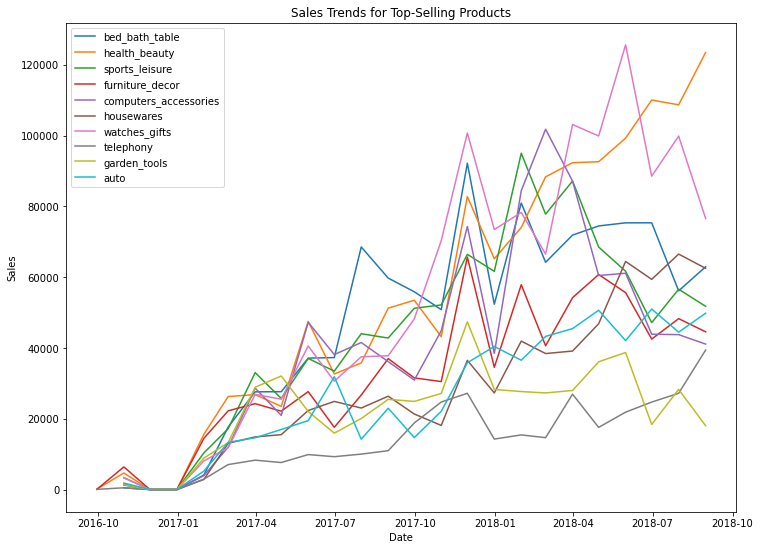

In [106]:
# Create a dictionary to store the sales trends for each top-selling product
sales_trends = {}
# Loop through each top-selling product and get its sales trends
fig, ax = plt.subplots(figsize=(12, 9))
for product in top_products.index:
    # Filter the merged_data for this product
    product_data = dataset[dataset['product_category_name_english'] == product]
    # Set the date column as the index
    product_data.set_index('order_purchase_timestamp', inplace=True)
     # Resample the data by month and sum the sales
    sales = product_data['price'].resample('M').sum()
    # Add the sales trends to the dictionary
    sales_trends[product] = sales
    
# Plot the sales trends for each top-selling product

for product, sales in sales_trends.items():
    plt.plot(sales.index, sales.values, label=product)

plt.legend()
plt.title('Sales Trends for Top-Selling Products')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### 11. Which payment method are most commonly used by Olist customers, and how does this vary by product category

In [107]:
dataset.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop


In [108]:
grouped_data = dataset.groupby(['payment_type', 'product_category_name_english'])['order_id'].count().reset_index()
grouped_data

,payment_type,product_category_name_english,order_id
0,boleto,agro_industry_and_commerce,60
1,boleto,air_conditioning,69
2,boleto,art,47
3,boleto,arts_and_craftmanship,7
4,boleto,audio,84
...,...,...,...
258,voucher,stationery,135
259,voucher,tablets_printing_image,4
260,voucher,telephony,219
261,voucher,toys,199


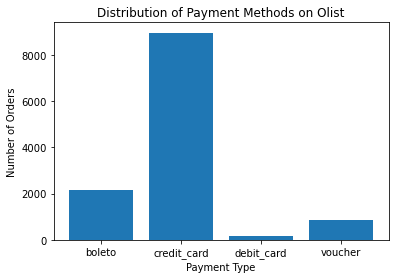

In [109]:
# Plot the payment method distribution
plt.bar(grouped_data['payment_type'], grouped_data['order_id'])
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.title('Distribution of Payment Methods on Olist')
plt.show()

In [110]:
pivot_data = grouped_data.pivot(index='payment_type', columns='product_category_name_english', values='order_id')

<AxesSubplot:xlabel='product_category_name_english', ylabel='payment_type'>

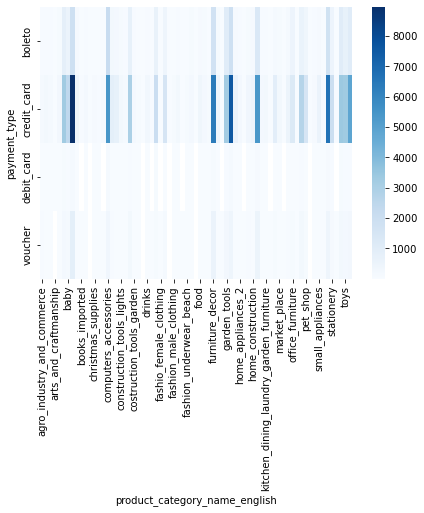

In [111]:
plt.rcParams["figure.figsize"] = [7.00, 5]
sns.heatmap(pivot_data, cmap='Blues')

Observation: The most commonly used payment method by customers is credit card

### 12. Which product categories have the highest profit margins on Olist, and how can the company increase profitability across different countries

In [112]:
df_order_items=dataframes['olist_order_items_dataset']
df_product=dataframes['olist_products_dataset']
df_product_english=dataframes['product_category_name_translation']

In [113]:
df_product_english.head(1)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


In [114]:
sales_data=pd.merge(df_order_items,df_product,on='product_id',how='left')
sales_data=pd.merge(sales_data, df_product_english, on='product_category_name', how='left')
sales_data.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [115]:
sales_data['COGS']=sales_data['freight_value'] + sales_data['price']

# Group the order items by product category and calculate the total revenue and COGS
#sales_data= sales_data.groupby('product_category_name').agg({'cogs': 'sum', 'price': 'sum'})

# calculate the gross profit margin for each product category 
sales_data['gross_profit_margin'] = (sales_data['price'] - sales_data['COGS']) / sales_data['price']

# group the data by product category and calculate the average gross profit margin 
profit_margin_data = sales_data.groupby('product_category_name_english')['gross_profit_margin'].mean()
profit_margin_data

product_category_name_english
agro_industry_and_commerce   -0.274248
air_conditioning             -0.211292
art                          -0.299337
arts_and_craftmanship        -0.381137
audio                        -0.331233
                                ...   
stationery                   -0.323691
tablets_printing_image       -0.222604
telephony                    -0.505945
toys                         -0.264980
watches_gifts                -0.170581
Name: gross_profit_margin, Length: 71, dtype: float64

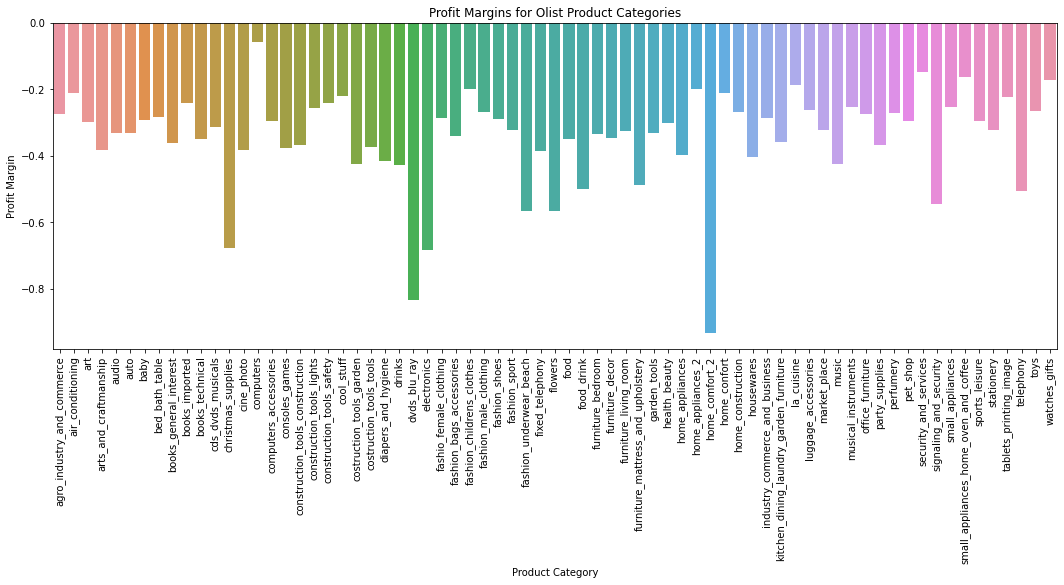

In [116]:
plt.figure(figsize=(18, 6))
sns.barplot(x=profit_margin_data.index, y=profit_margin_data.values)
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Profit Margin')
plt.title('Profit Margins for Olist Product Categories')
plt.show()

# 13. How does Olist's marketing spend and channel mix impact sales and customer acquisition costs, and how can the company optimize its marketing strategy to increase ROI

From the insights gotten from the data, we can say Olist marketing spend and channel mix impact sales of some products positively, while some products didn't generate much revenue. However, to optimize its marketing strategy to increase ROI, Olist should consider focusing on Search engine optimization to increase visibility and attract more customers, reduce the cost of customer acquisition. The lower the CCA,the more profitable Olist will be. And Olist focus more on fast selling products such as those in the computer accessories.